### A. Import Python Modules and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster 
from sklearn import preprocessing 

In [4]:
df = pd.read_csv("loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float) 

print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### B. Rescale the Data

In [6]:
#data looks scaled already? 
df.describe().transpose().style.format("{:.2f}")

### C. Scatterplot Function 

In [7]:
#function is straight from lab3 
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

In [54]:
k =  2     #I think there should be 2 here - loans status y/n? played around - 2 is best 

In [55]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

In [56]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

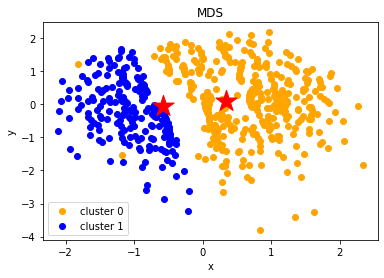

In [57]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

clustering_scatterplot(points=XYcoordinates[:-k,:], labels=clustered_data_sklearn.labels_, centers=XYcoordinates[-k:,:], title='MDS')

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [58]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


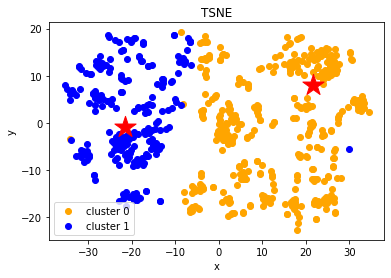

In [59]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis